<h2>How to use photosom</h2>
PhotoSOM is a Kohonen Map based framework for evaluating photometric redshift estimation methods with statistical tests.

It takes 2D numpy arrays as input, with (redshift)+(number of filters) columns and (number of galaxies) rows. Any imported data must be transformed into this format.

In [1]:
import photosom as ps
import numpy as np
import matplotlib.pyplot as plt

# Load data from .dat file
train_raw = np.loadtxt('datasets/train_data.dat') #training region
test_raw = np.loadtxt('datasets/cv_data.dat') #sample region

# redshift, u, g, r, i, z, y
train = np.column_stack((train_raw[:,1], train_raw[:,4], train_raw[:,6], train_raw[:,8],
                         train_raw[:,10], train_raw[:,12], train_raw[:,14]))
test = np.column_stack((test_raw[:,1], test_raw[:,4], test_raw[:,6], test_raw[:,8],
                        test_raw[:,10], test_raw[:,12], test_raw[:,14]))

The initialization takes training data, testing data, and an optional seed for the random state for reproduceable results

In [2]:
pz = ps.PhotoSOM(train, test, random_seed=338041)

48430 training and 9440 testing galaxies initialized


<h4>Defining the Ranges</h4>

Currently, photosom supports single max and min values for redshift and magnitude.

The selection function that is implemented separates the dataset into bins of equal numbers of galaxies based on color, then cuts the lower defined percentile of redshift from each bin. This maintains the color distribution while changing the redshift distribution drastically.

In [3]:
z_cutoff_range = [0, 3.1]      # [0, 3.1]    for complete data
mag_cutoff_range = [14, 25.5]  # [14, 25.5]  for complete data
percentile_cut = 0.5           # 0.0         for complete data
n_bins = 100

pz.assignRange(z_cutoff_range, mag_cutoff_range, mag_filter=3)
pz.selectionFunction(30, percentile_cut, filter1=2, filter2=3)
# filter 1 & 2 define the magnitudes by which the color is determined
# for example, filter1=2 and filter2=3 means the color is defined as r-i band here

<h4>Making Predictions for Redshift</h4>

Galaxy redshift predictions can be made using ideal gaussian pdfs and Machine Learning pdfs (using the Random Forest classifier). The last prediction method used will give the pdfs used for any subsequent graphs and data.

In [4]:
# First value is the sigma at which the pdf means are sampled from the truth values
# Second value is the sigma used to construct the actual gaussian pdf prediction
gaussian_pdfs = pz.idealGaussian(0.05, 0.05)
pz.predictionPlot(title="Predicted Redshfits vs. Truth Values")

There are 24262 training galaxies selected


alt.LayerChart(...)

In [5]:
# Other classifiers can be implemented fairly easily
ml_pdfs = pz.randomForestTraining()
pz.predictionPlot(title="Predicted Redshfits vs. Truth Values")

There are 24262 training galaxies selected
4 bins missing, [1 2 3 6]


alt.LayerChart(...)

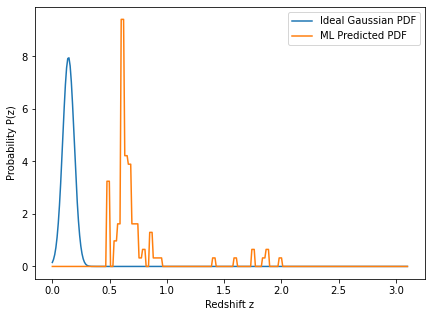

In [6]:
# This is a simple plot to compare the results of the two prediction methods for a given galaxy
n = np.random.randint(len(pz.pdfs))
x = np.linspace(0, 3.1, 300)

f = plt.figure(figsize=(7,5))
plt.plot(x, gaussian_pdfs[n].pdf(x))
plt.plot(x, ml_pdfs[n].pdf(x))
plt.legend(['Ideal Gaussian PDF', 'ML Predicted PDF'])
plt.xlabel('Redshift z')
plt.ylabel('Probability P(z)')
plt.show()

<h4>Using the Self-Organizing Map</h4>

This implementation of the minisom package streamlines everything for use with the galaxies. Once initialized, the graphs only need to be called. Each map plot has the following arguments:

title - Title of the entire plot

pixel - Length of one side of the graph

scheme - Vega color scheme (https://vega.github.io/vega/docs/schemes/)

Each given map may also have extra arguments, shown below.

In [7]:
pz.initSOM(20)

In [8]:
pz.colorMap(title="r-i Color per SOM Cell", filter1=2, filter2=3)
# The filter arguments here are the same as the selection function above

alt.Chart(...)

This Color Map displays the average color of each cell, based on the mean color of galaxies which are in each cell.

In [9]:
pz.densityMap(title="Galaxy Density")

alt.Chart(...)

This Density Map displays the numbers of galaxies found in each cell.

In [10]:
pz.chiSquaredMap(title="Chi Squared per DOF Value")

C:\Users\imcma\Documents\Personal\Summer\2020\Project\photosom\photosom.py:455: RuntimeWarning: invalid value encountered in double_scalars
  chi_squared += ((hist[k] - len(cdf) / bins)**2)/(len(cdf) / bins)


alt.Chart(...)

This is the chi-squared per degree of freedom for each cell, based on the sigma and mean of each galaxy pdf.

In [11]:
pz.chiSquaredTest(title="")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:6125: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs.astype(np.float64) - f_exp)**2 / f_exp


Failure Rate: 45.5%


alt.Chart(...)

The Null hypothesis states that 5% of cells should be above the 95th percentile in the chi-squared distribution when compared to a distribution that perfectly describes the test distribution.

In [12]:
pz.cdfHistogram()

alt.Chart(...)